<a href="https://colab.research.google.com/github/GiuliaOrgiana/UnicaIsdeTest/blob/main/MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=True)

print(mnist.data.shape)

(70000, 784)


(70000, 784) (70000,)
[5 0 4 1 9 2 1 3 1 4]
(28, 28)


Text(0.5, 1.0, 'Label: 5')

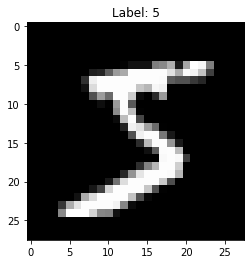

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = mnist.data
y = np.array(mnist.target, dtype=int)
print(x.shape, y.shape)

print(y[0:10])
i=0
img = x[0, :].reshape(28,28)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.title("Label: "+ str(y[i]))

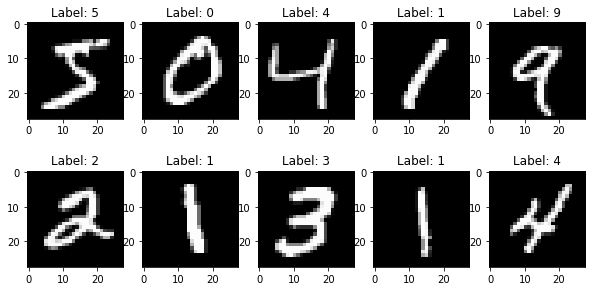

In [3]:
def plot_ten_digits(x,y):
    plt.figure(figsize=(10,5))
    for i in range(10):
      plt.subplot(2,5, i+1)
      img=x[i,:].reshape(28,28)
      plt.imshow(img, cmap='gray')
      plt.title("Label: "+ str(y[i]))



<BarContainer object of 10 artists>

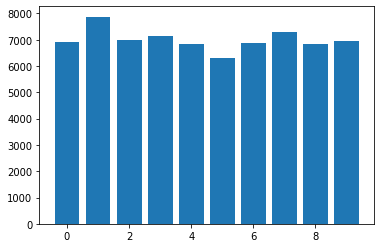

In [4]:
def samples_per_class(y):
  class_labels=np.unique(y)
  n_classes = class_labels.size
  n_samples_per_class= np.zeros(shape=(n_classes, ))

  for k in range(n_classes):
    n_samples_per_class[k]=np.sum(y==k)

  return n_samples_per_class, class_labels

n_samples_per_class, class_labels = samples_per_class(y) 
plt.bar(class_labels,n_samples_per_class)



In [5]:
#data spits: goal is to split X,y into two disjoint sets. 

n_samples = x.shape[0]
n_tr = 10
n_ts = 100
idx = np.random.randint(0,n_samples,n_tr)
print(idx)
#idx = np.array([0,1,4,5])
#extract 1000 random imagies from X matrix -> how do I generate this index vector?
x_trt=x[idx,:]
y_tr = y[idx]

print(x_trt, y_tr)
#input X,y -> output X_tr, y_tr, X_ts, y_ts
# input(0,1,2,3,...6999) -> shuffle -> extract the first n_tr, n_td -<z oputput idx_tr, idx_ts

[57479  4815 36522 42463 11226 13066 42885 34416 38778 33213]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [7 1 2 1 6 0 2 0 8 2]


(50000, 784) (20000, 784) (50000,) (20000,)


<BarContainer object of 10 artists>

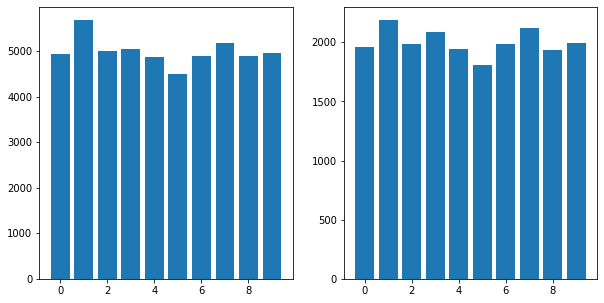

In [9]:

n_tr = 50000
n_ts = 20000
#input X,y -> output X_tr, y_tr, X_ts, y_ts
# input(0,1,2,3,...6999) -> shuffle -> extract the first n_tr, n_td -<z oputput idx_tr, idx_ts


def split_data(x,y,n_tr, n_ts):
  n_samples = x.shape[0]
  idx=np.linspace(0,n_samples-1, num=n_samples, dtype=int)
  np.random.shuffle(idx)
  idx_tr = idx[:n_tr]
  idx_ts = idx[n_tr:n_tr+n_ts]
  
  x_tr = x[idx_tr, :]
  y_tr= y[idx_tr]
  x_ts = x[idx_ts, :]
  y_ts= y[idx_ts]
  return x_tr, y_tr, x_ts, y_ts

x_tr, y_tr, x_ts, y_ts = split_data(x,y,n_tr,n_ts)
print(x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape)

n_tr_samples_per_class, class_labels = samples_per_class(y_tr) 
n_ts_samples_per_class, class_labels = samples_per_class(y_ts) 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(class_labels,n_tr_samples_per_class)
plt.subplot(1,2,2)
plt.bar(class_labels,n_ts_samples_per_class)

(10, 784)


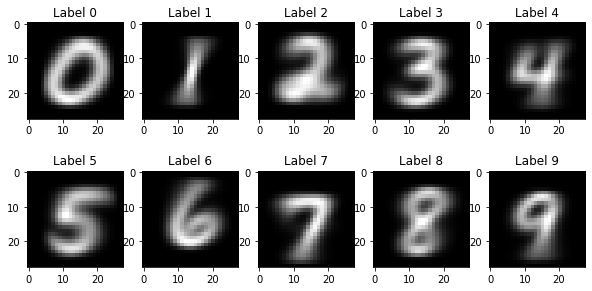

In [18]:
n_classes = np.unique(y_tr).size
n_features= x_tr.shape[1]
centroids = np.zeros(shape=(n_classes, n_features))
print(centroids.shape)

for k in range(n_classes):
  xk=x_tr[y_tr==k, :]
  centroids[k, :] = np.mean(xk, axis=0)

plt.figure(figsize=(10,5))
for k in range(n_classes):
    plt.subplot(2,5, k+1)
    plt.imshow(centroids[k,:].reshape(28,28), cmap='gray')
    plt.title("Label "+ str(k))
